# WHO national life expectancy analysis and prediction

## Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import missingno as msno

## Import dataset

In [2]:
df = pd.read_csv('who_life_exp.csv')
df.head()

country country_code  region  year  life_expect  life_exp60  \
0  Angola          AGO  Africa  2000     47.33730    14.73400   
1  Angola          AGO  Africa  2001     48.19789    14.95963   
2  Angola          AGO  Africa  2002     49.42569    15.20010   
3  Angola          AGO  Africa  2003     50.50266    15.39144   
4  Angola          AGO  Africa  2004     51.52863    15.56860   

   adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp    une_pop  \
0         383.5583     0.137985    0.025695  1.47439  ...  1.90860  16395.473   
1         372.3876     0.133675    0.024500  1.94025  ...  4.48352  16945.753   
2         354.5147     0.128320    0.023260  2.07512  ...  3.32946  17519.417   
3         343.2169     0.122040    0.021925  2.20275  ...  3.54797  18121.479   
4         333.8711     0.115700    0.020545  2.41274  ...  3.96720  18758.145   

   une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
0       122.2    46.522      1.0   2530.0         32.3        2.60753   
1       118.9    47.059      1.1   2630.0          NaN            NaN   
2       115.1    47.702      1.2   3180.0          NaN            NaN   
3       110.8    48.440      1.3   3260.0          NaN            NaN   
4       106.2    49.263      1.3   3560.0          NaN            NaN   

   une_literacy  une_school  
0           NaN         NaN  
1      67.40542         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 32 columns]

In [35]:
len(df['year'].value_counts())

17

### Shape analysis

In [4]:
df.shape

(3111, 32)

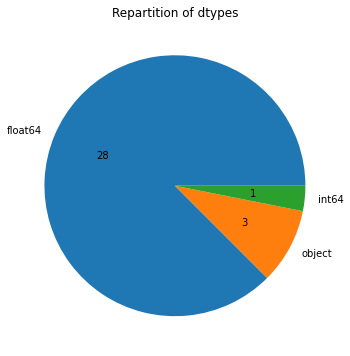

In [5]:
df_dtypes = df.dtypes.value_counts()

plt.figure(figsize=(6, 6))
ax = df_dtypes.plot.pie(
    y=df_dtypes.index,
    label="",
    title="Repartition of dtypes",
    autopct=lambda x: '{:.0f}'.format(x*df_dtypes.sum()/100)
)

### Missing values

In [4]:
per_missing = df.isna().sum() / df.shape[0]
per_missing.sort_values(ascending=False)

hospitals          0.958213
une_literacy       0.816458
une_school         0.741241
une_poverty        0.706525
doctors            0.427837
une_edu_spend      0.413372
une_hiv            0.238187
gni_capita         0.219222
hepatitis          0.182899
une_gni            0.037608
che_gdp            0.037608
gghe-d             0.032144
alcohol            0.016072
une_pop            0.011893
age5-19obesity     0.010929
age5-19thinness    0.010929
bmi                0.010929
basic_water        0.010286
diphtheria         0.006107
polio              0.006107
measles            0.006107
country_code       0.000000
age1-4mort         0.000000
infant_mort        0.000000
une_infant         0.000000
une_life           0.000000
adult_mortality    0.000000
life_exp60         0.000000
life_expect        0.000000
year               0.000000
region             0.000000
country            0.000000
dtype: float64

<AxesSubplot:>

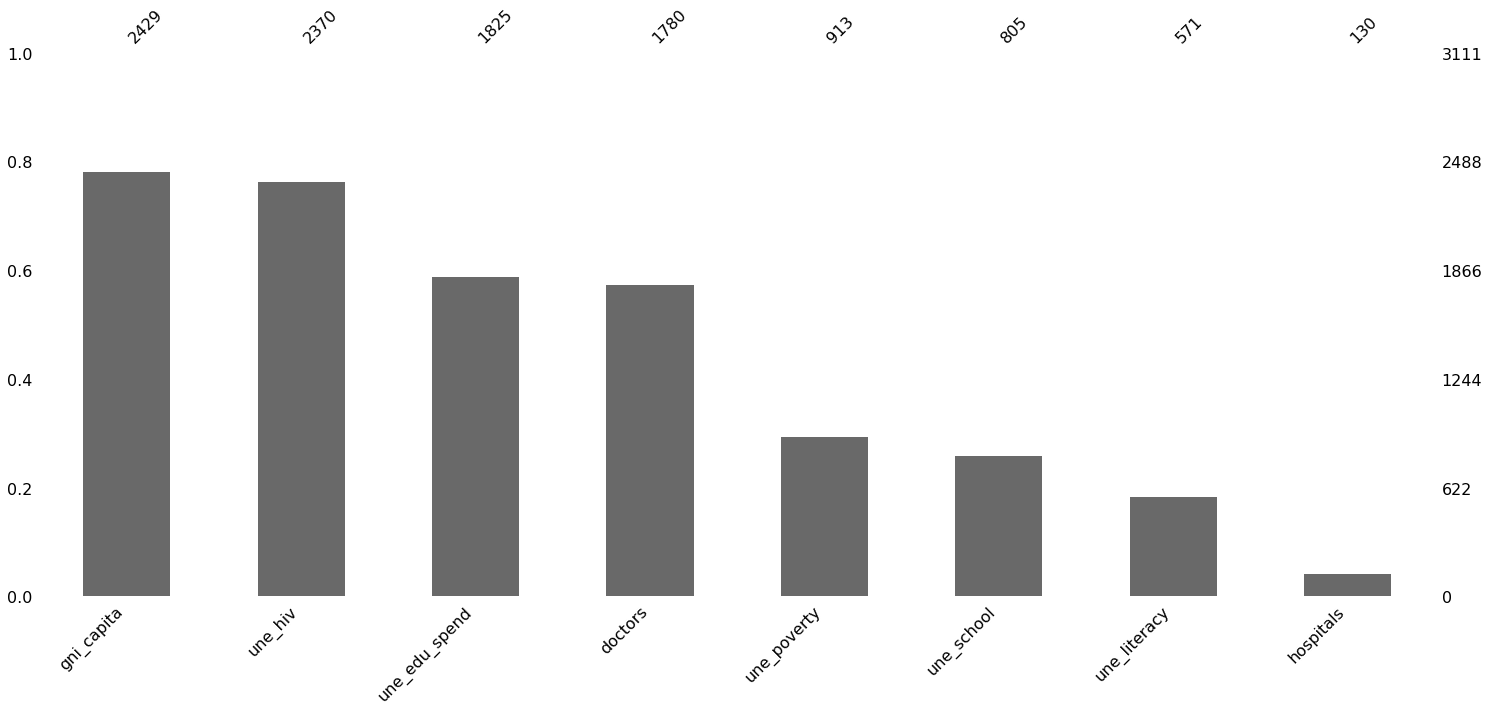

In [5]:
# Observe cols where with at least 20% missing values
per_miss_20 = df[df.columns[per_missing > 0.2]]
msno.bar(
    per_miss_20, 
    sort='descending'
)

In [6]:
df[df['hospitals'].notna()].groupby(['year']).count()

country  country_code  region  life_expect  life_exp60  adult_mortality  \
year                                                                            
2013      129           129     129          129         129              129   
2014        1             1       1            1           1                1   

      infant_mort  age1-4mort  alcohol  bmi  ...  che_gdp  une_pop  \
year                                         ...                     
2013          129         129      129  128  ...      125      127   
2014            1           1        1    1  ...        1        1   

      une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
year                                                                       
2013         129       129      104      126           37             80   
2014           1         1        1        1            1              0   

      une_literacy  une_school  
year                            
2013            24          37  
2014             1           0  

[2 rows x 31 columns]

<AxesSubplot:>

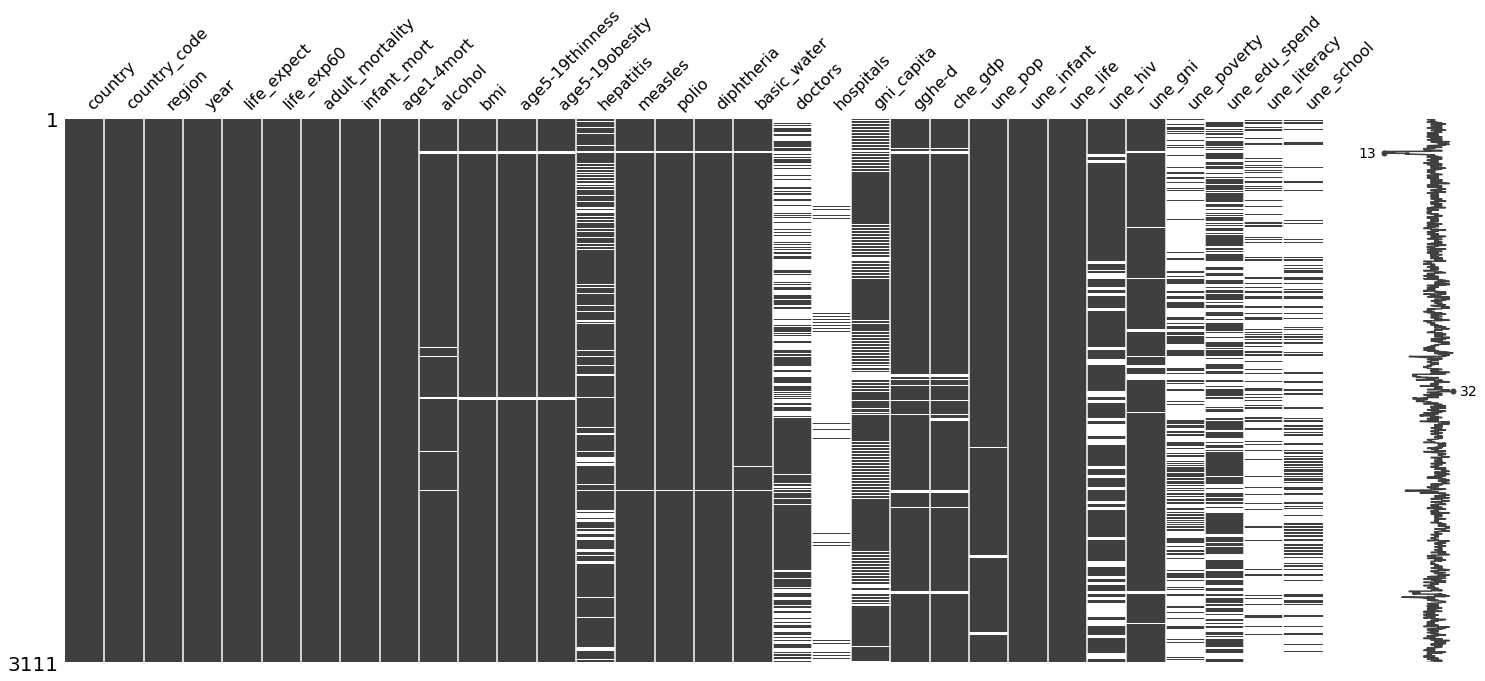

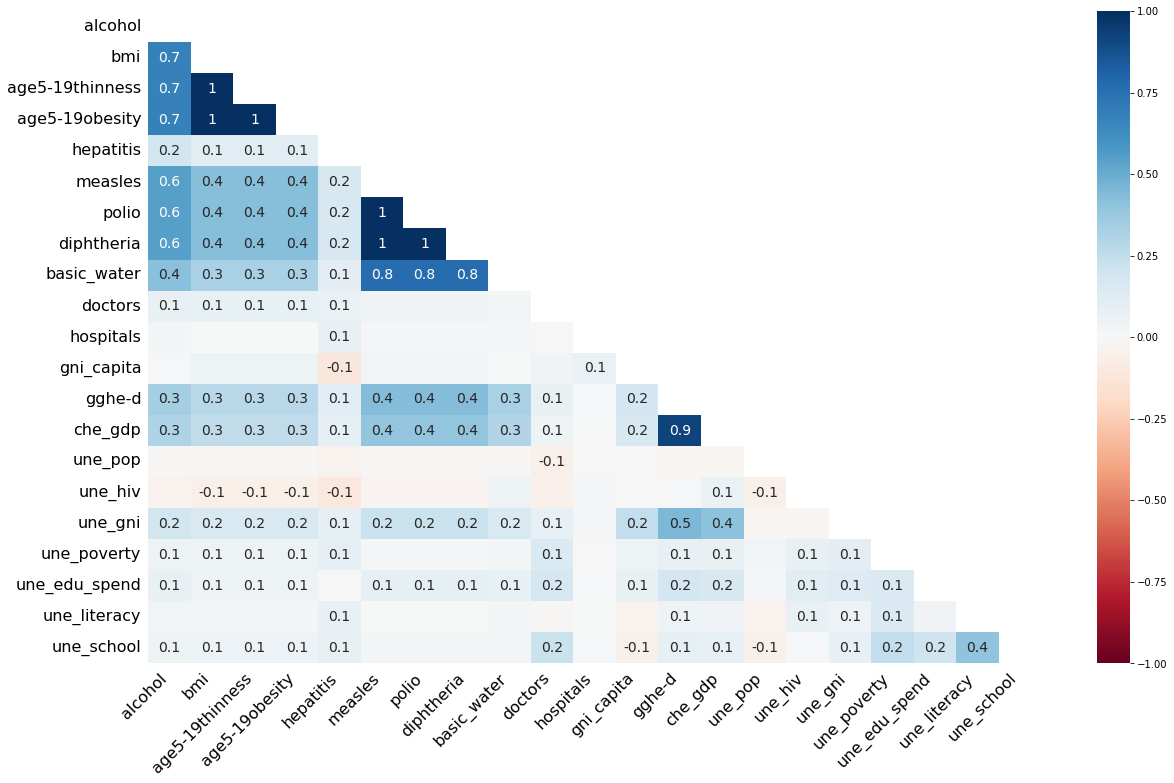

In [9]:
# General view of missing values on the entire dataset
msno.matrix(df)
msno.heatmap(df)

## Numerical analysis

In [7]:
df_clean = df[df.columns[per_missing < 0.8]]
df_clean.describe()

year  life_expect   life_exp60  adult_mortality  infant_mort  \
count  3111.000000  3111.000000  3111.000000      3111.000000  3111.000000   
mean   2008.000000    69.146384    18.912060       193.527786     0.032496   
std       4.899767     9.129761     2.885412       114.007447     0.030361   
min    2000.000000    36.227360    10.728000        49.201850     0.001470   
25%    2004.000000    63.200095    16.619485       108.269750     0.008255   
50%    2008.000000    71.597200    18.508260       164.822200     0.019995   
75%    2012.000000    75.537030    21.099175       250.832300     0.051720   
max    2016.000000    84.166160    26.394020       696.874200     0.164515   

        age1-4mort      alcohol          bmi  age5-19thinness  age5-19obesity  \
count  3111.000000  3061.000000  3077.000000      3077.000000     3077.000000   
mean      0.003489     4.834781    25.052714         5.312447        5.972278   
std       0.005146     3.998741     2.193445         4.652408        4.530812   
min       0.000065     0.000000    19.800000         0.100000        0.100000   
25%       0.000355     1.198030    23.300000         1.800000        2.000000   
50%       0.000895     3.993560    25.500000         3.800000        5.200000   
75%       0.004877     7.723420    26.500000         7.800000        8.900000   
max       0.039095    20.182460    32.200000        28.100000       26.700000   

       ...       gghe-d      che_gdp       une_pop   une_infant     une_life  \
count  ...  3011.000000  2994.000000  3.074000e+03  3111.000000  3111.000000   
mean   ...     3.122935     6.110353  3.707550e+04    30.488428    68.957352   
std    ...     2.091720     2.505267  1.378377e+05    27.756930     9.359194   
min    ...     0.062360     1.025160  7.601600e+01     1.600000    39.441000   
25%    ...     1.533445     4.238798  2.195105e+03     8.000000    62.844500   
50%    ...     2.601300     5.758030  8.544297e+03    19.500000    71.409000   
75%    ...     4.278110     7.850327  2.509552e+04    48.050000    75.570645   
max    ...    12.062730    20.413410  1.414049e+06   142.400000    83.984880   

           une_hiv        une_gni  une_poverty  une_edu_spend  une_school  
count  2370.000000    2994.000000   913.000000     1825.00000  805.000000  
mean      2.038397   14964.832999    10.845893        4.53293    9.712214  
std       4.593804   17495.137508    17.168798        1.75428    2.854723  
min       0.100000     420.000000     0.100000        0.78744    0.559340  
25%       0.100000    2970.000000     0.600000        3.26283    7.735940  
50%       0.400000    8340.000000     3.100000        4.42541   10.270400  
75%       1.500000   20482.500000    12.400000        5.49498   12.070610  
max      28.200000  122670.000000    94.100000       14.05908   14.378800  

[8 rows x 27 columns]

### Distribution per year

In [11]:
df['year'].value_counts()

2000    183
2009    183
2015    183
2014    183
2013    183
2012    183
2011    183
2010    183
2008    183
2001    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2016    183
Name: year, dtype: int64

### Target distribution

In [9]:
targets = ['life_expect', 'une_life', 'life_exp60']

In [51]:
# Targets global distribution
for t in targets:
    fig = px.violin(df_clean,
        title=f'Distribution of {t}',
        y = t,
        points='all',
        box=True,
    )
    fig.show()

In [54]:
# Look at outliers
df_clean[df_clean['life_expect'] == df_clean['life_expect'].min()]

country country_code    region  year  life_expect  life_exp60  \
1166   Haiti          HTI  Americas  2010     36.22736      10.728   

      adult_mortality  infant_mort  age1-4mort  alcohol  ...   gghe-d  \
1166         682.5308     0.077865      0.0211  2.31526  ...  1.45539   

      che_gdp   une_pop  une_infant  une_life  une_hiv  une_gni  une_poverty  \
1166   8.1456  9949.322        85.6    60.511      2.1   1480.0          NaN   

      une_edu_spend  une_school  
1166            NaN         NaN  

[1 rows x 30 columns]

In [52]:
df_clean[df_clean['une_life'] == df_clean['une_life'].min()]

country country_code  region  year  life_expect  life_exp60  \
374  Sierra Leone          SLE  Africa  2000     39.82734    10.87851   

     adult_mortality  infant_mort  age1-4mort  alcohol  ...   gghe-d  \
374         533.4928     0.164515     0.02943  3.74609  ...  2.07761   

      che_gdp   une_pop  une_infant  une_life  une_hiv  une_gni  une_poverty  \
374  11.51733  4584.571       142.4    39.441      1.5    700.0          NaN   

     une_edu_spend  une_school  
374        4.94937         NaN  

[1 rows x 30 columns]

### Continuous variables distribution

In [164]:
def plot_multi_distrib(data: pd.DataFrame, x: str, col_var: str, n_cols: int, hue=None, height=4, **kwargs):
    """_summary_
        Parameters
            data (pd.DataFrame) -- _description_
            x (str) -- _description_
            col_var (str) -- _description_
            n_cols (int) -- _description_
            hue (_type_) -- _description_ (default: None)
            height (int) -- _description_ (default: 4)
    """
    g = sns.FacetGrid(data, col=col_var, col_wrap=n_cols, hue=hue, height=height, sharex=False, sharey=False)
    g.map(sns.kdeplot, 'value', kwargs)
    g.add_legend()

In [158]:
f_cols = df_clean.select_dtypes('float')
f_cols = [c for c in f_cols if c not in targets]

# Continuous variables
float_melt_df = df_clean.melt(id_vars=['region'], value_vars=f_cols, var_name='var')
float_melt_df.head()

region              var     value
0  Africa  adult_mortality  383.5583
1  Africa  adult_mortality  372.3876
2  Africa  adult_mortality  354.5147
3  Africa  adult_mortality  343.2169
4  Africa  adult_mortality  333.8711

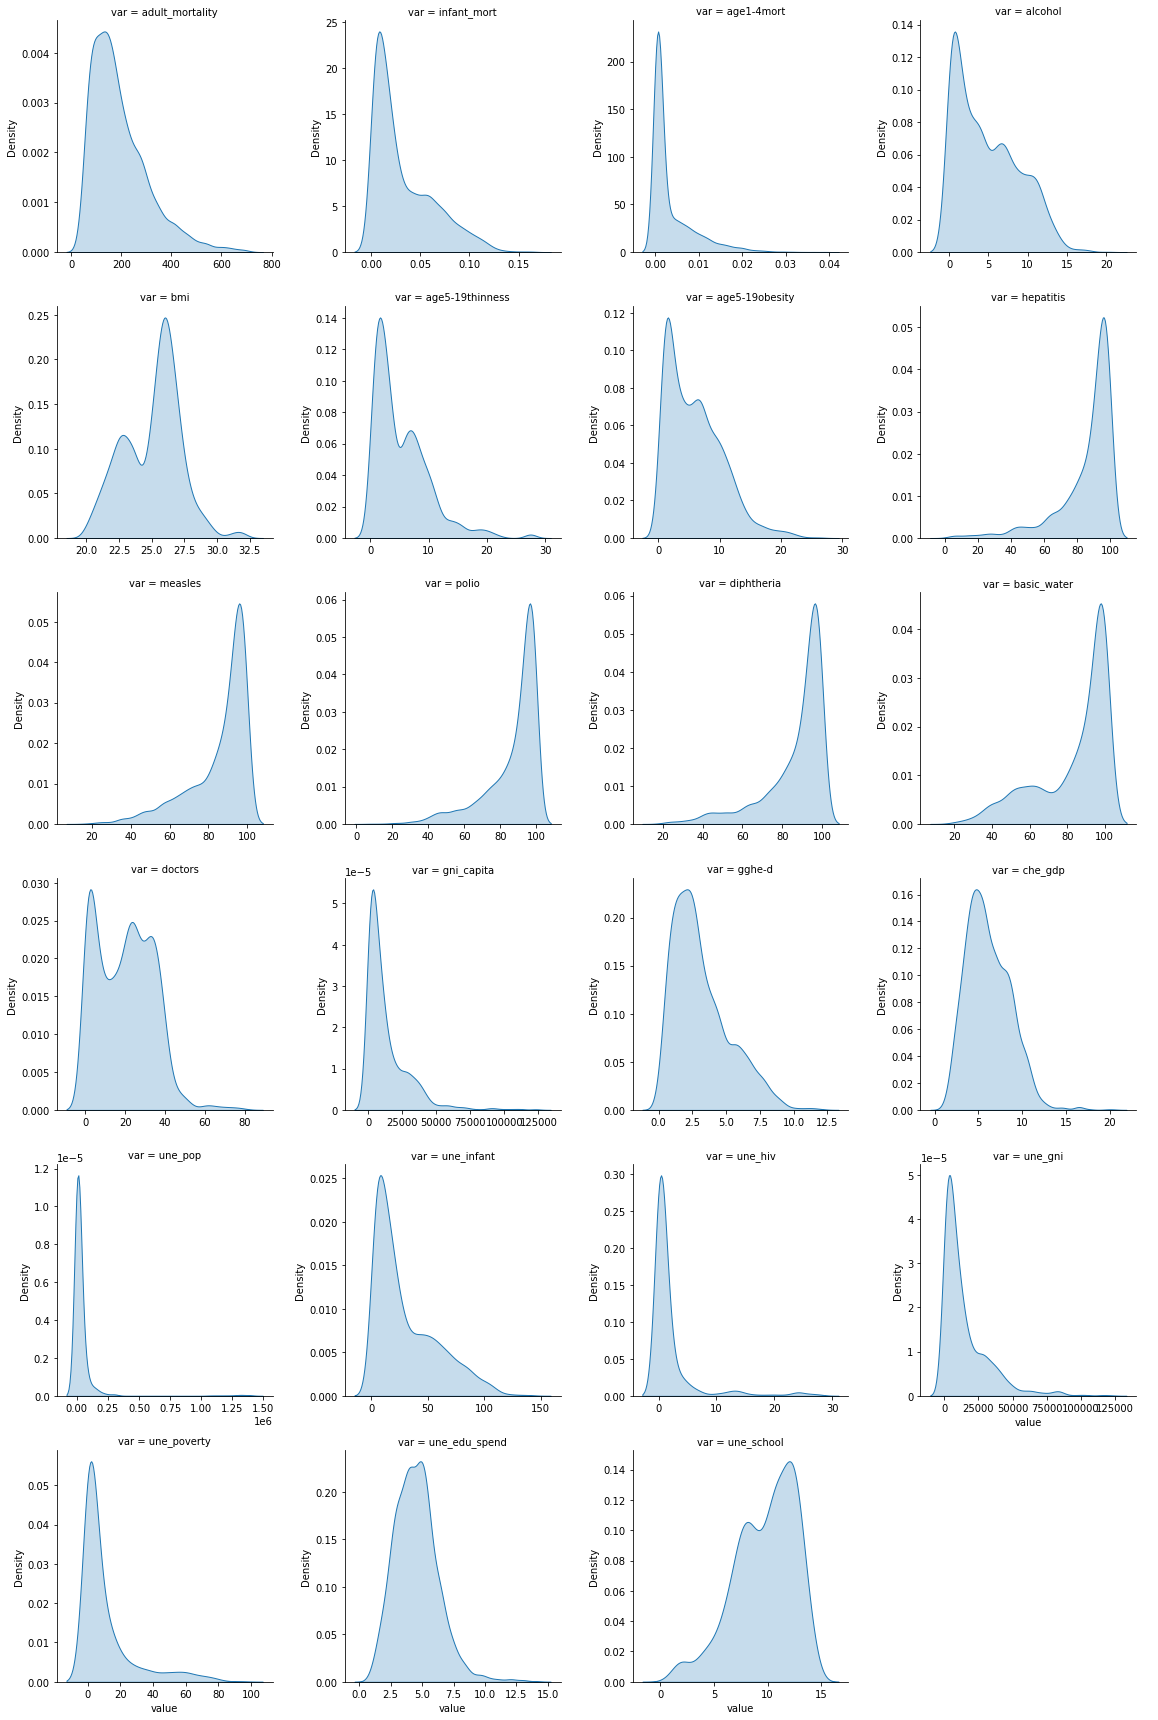

In [165]:
# Float variables distribution
plot_multi_distrib(float_melt_df, x='value', col_var='var', n_cols=4, **{'fill': True})

## Bi-variate analysis : correlations with targets

In [27]:
def corr_report(df: pd.DataFrame, hue: str='region', figsize=(9, 6)):
    # Heatmap
    plt.figure(figsize=figsize)
    hm = sns.heatmap(df.corr(), annot=True, square=True)
    hm.set_xticklabels(hm.get_xticklabels(), rotation=45)
    
    # Pairplot
    sns.pairplot(df, hue=hue)

In [10]:
base_cols = [*targets, 'region']

### Mortality

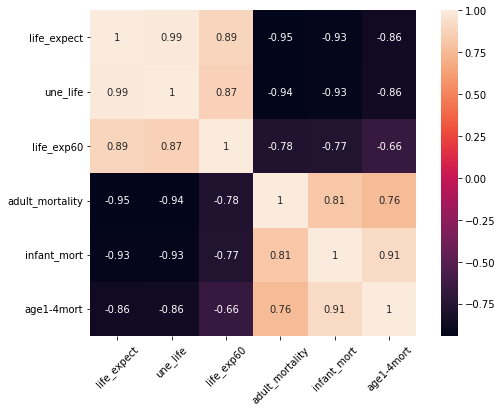

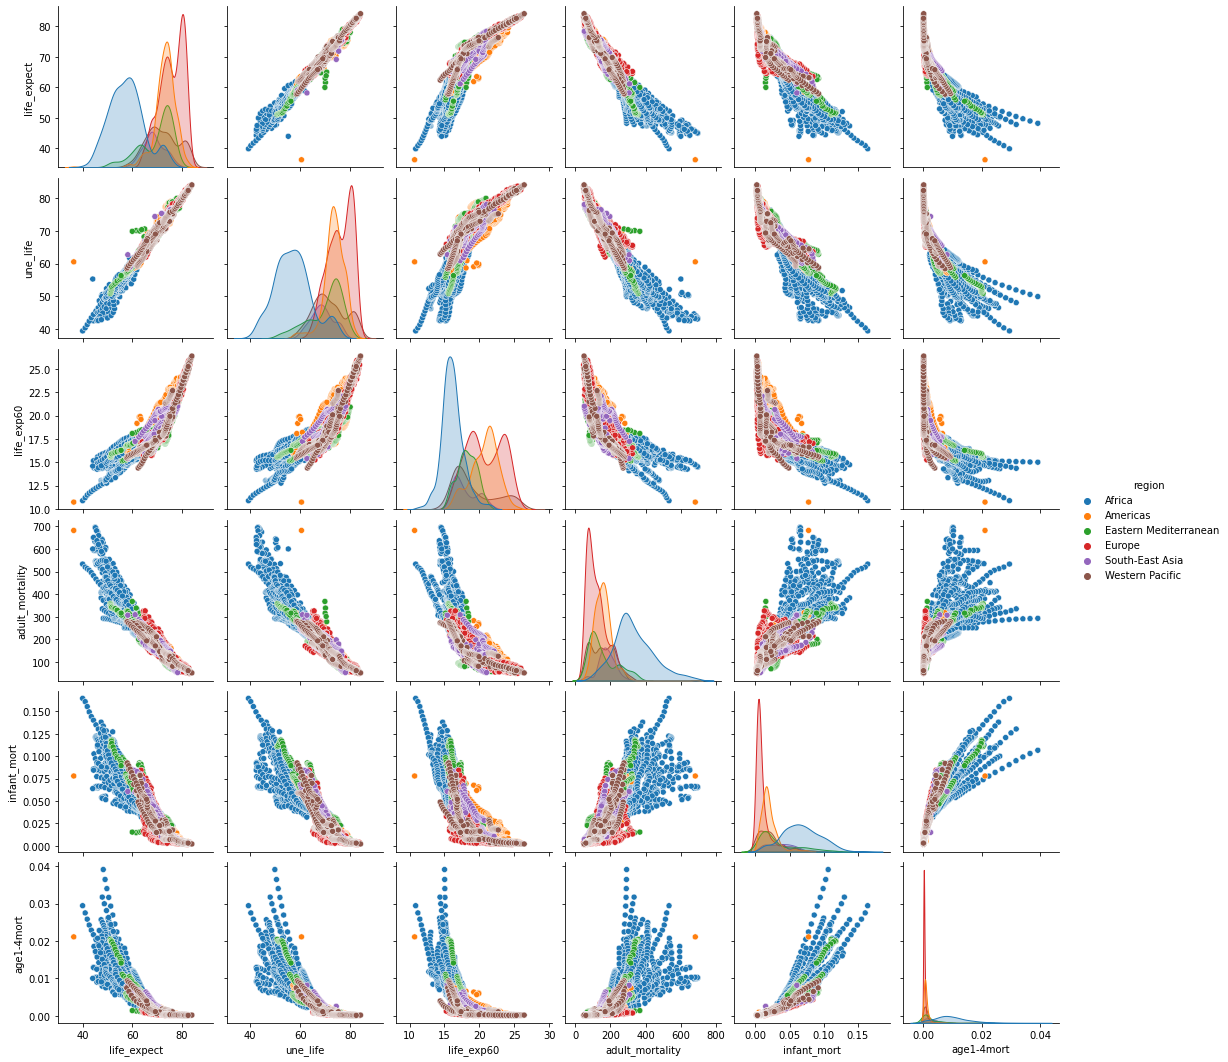

In [28]:
mortality_rates = df_clean[[*base_cols, 'adult_mortality', 'infant_mort', 'age1-4mort']]
corr_report(mortality_rates, figsize=(9, 6))

In [19]:
# Mortality and target over the year
for col in ['adult_mortality', 'infant_mort', 'age1-4mort']: 
    px.scatter(
        df_clean,
        title=f'Evolution between {col} and life expectancy over the years',
        x=col, 
        y='life_expect', 
        color='region',
        facet_col='year', facet_col_wrap=6).show()

### Population health correlations

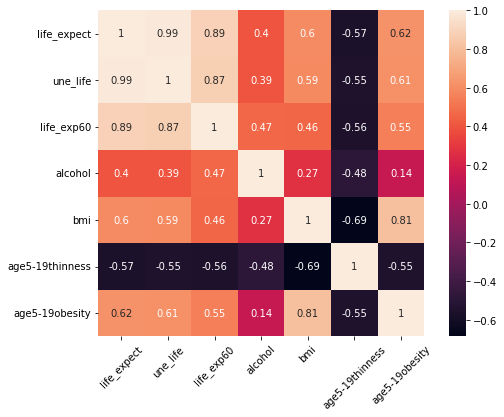

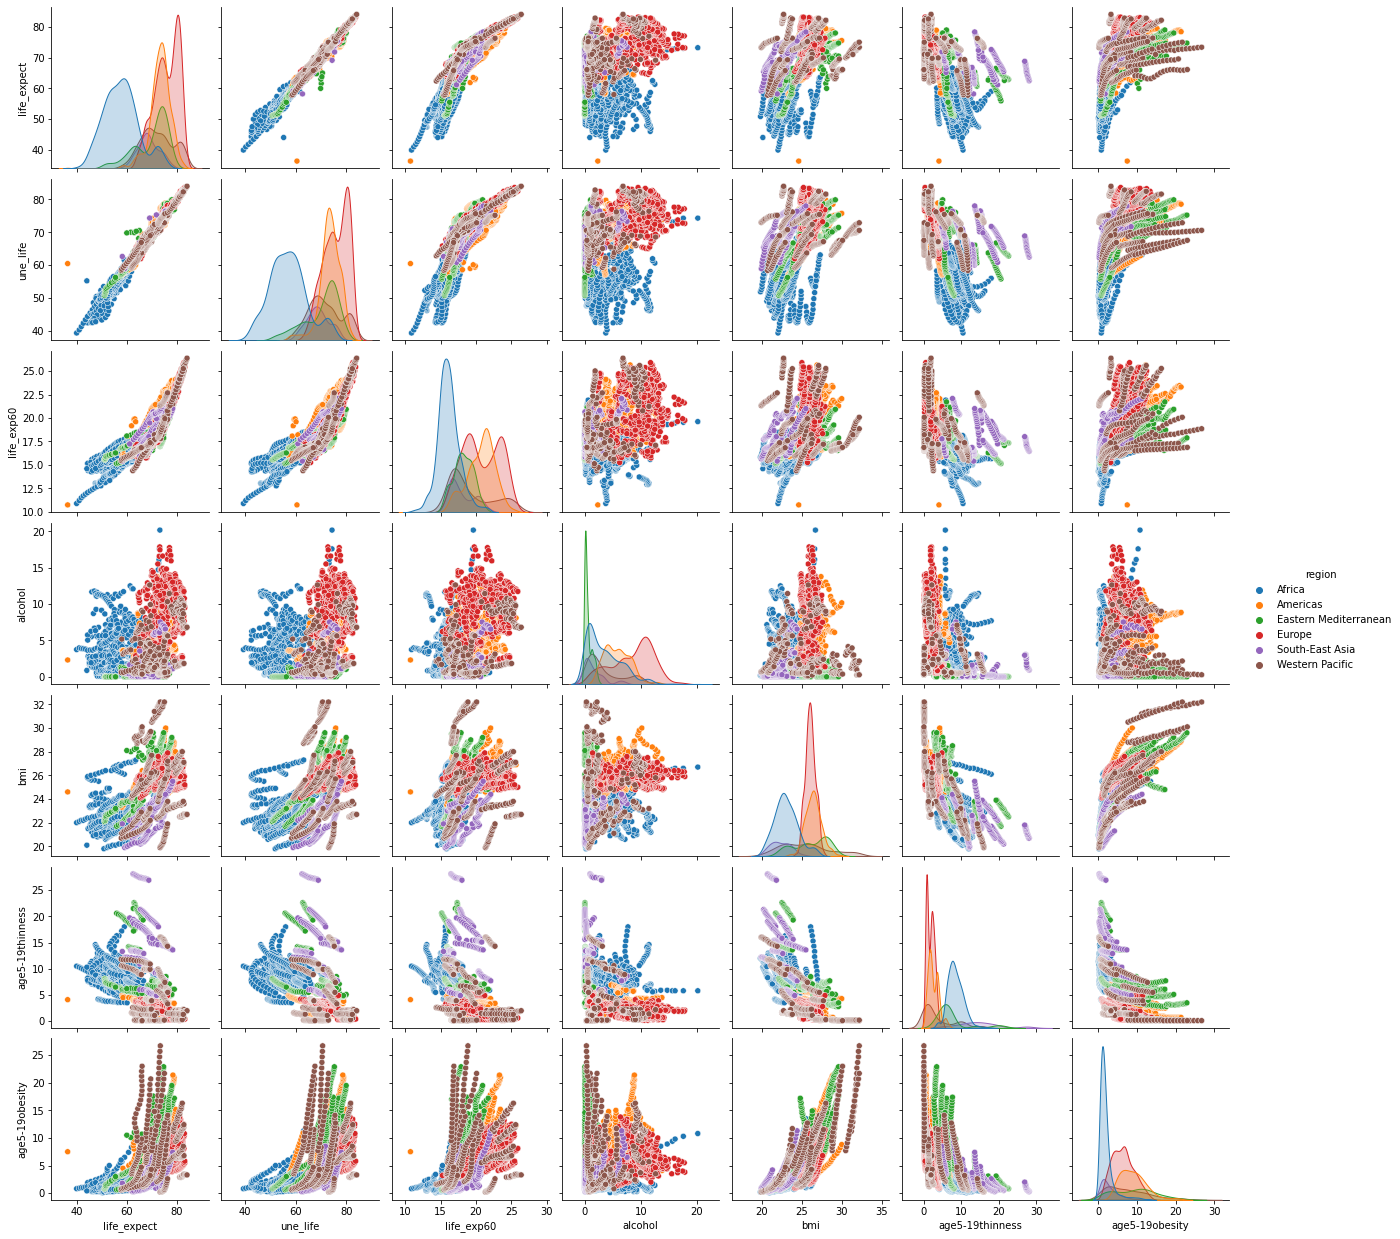

In [31]:
# pop shape correlations
pop_shape_df = df_clean[[*base_cols, 'alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity']]
corr_report(pop_shape_df)

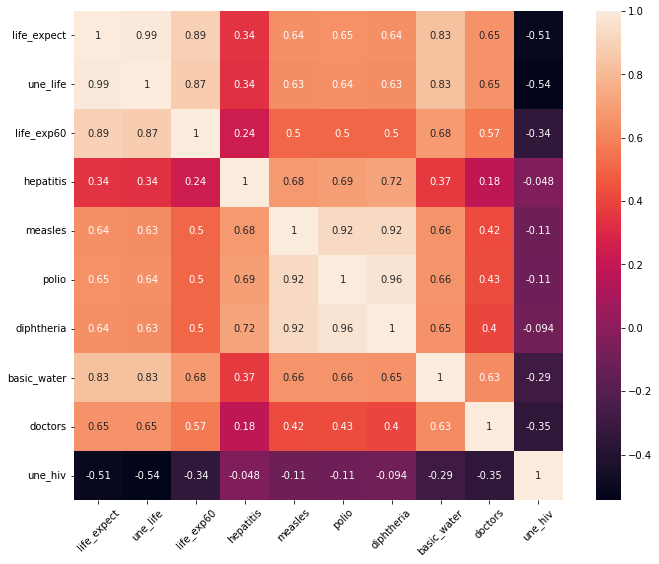

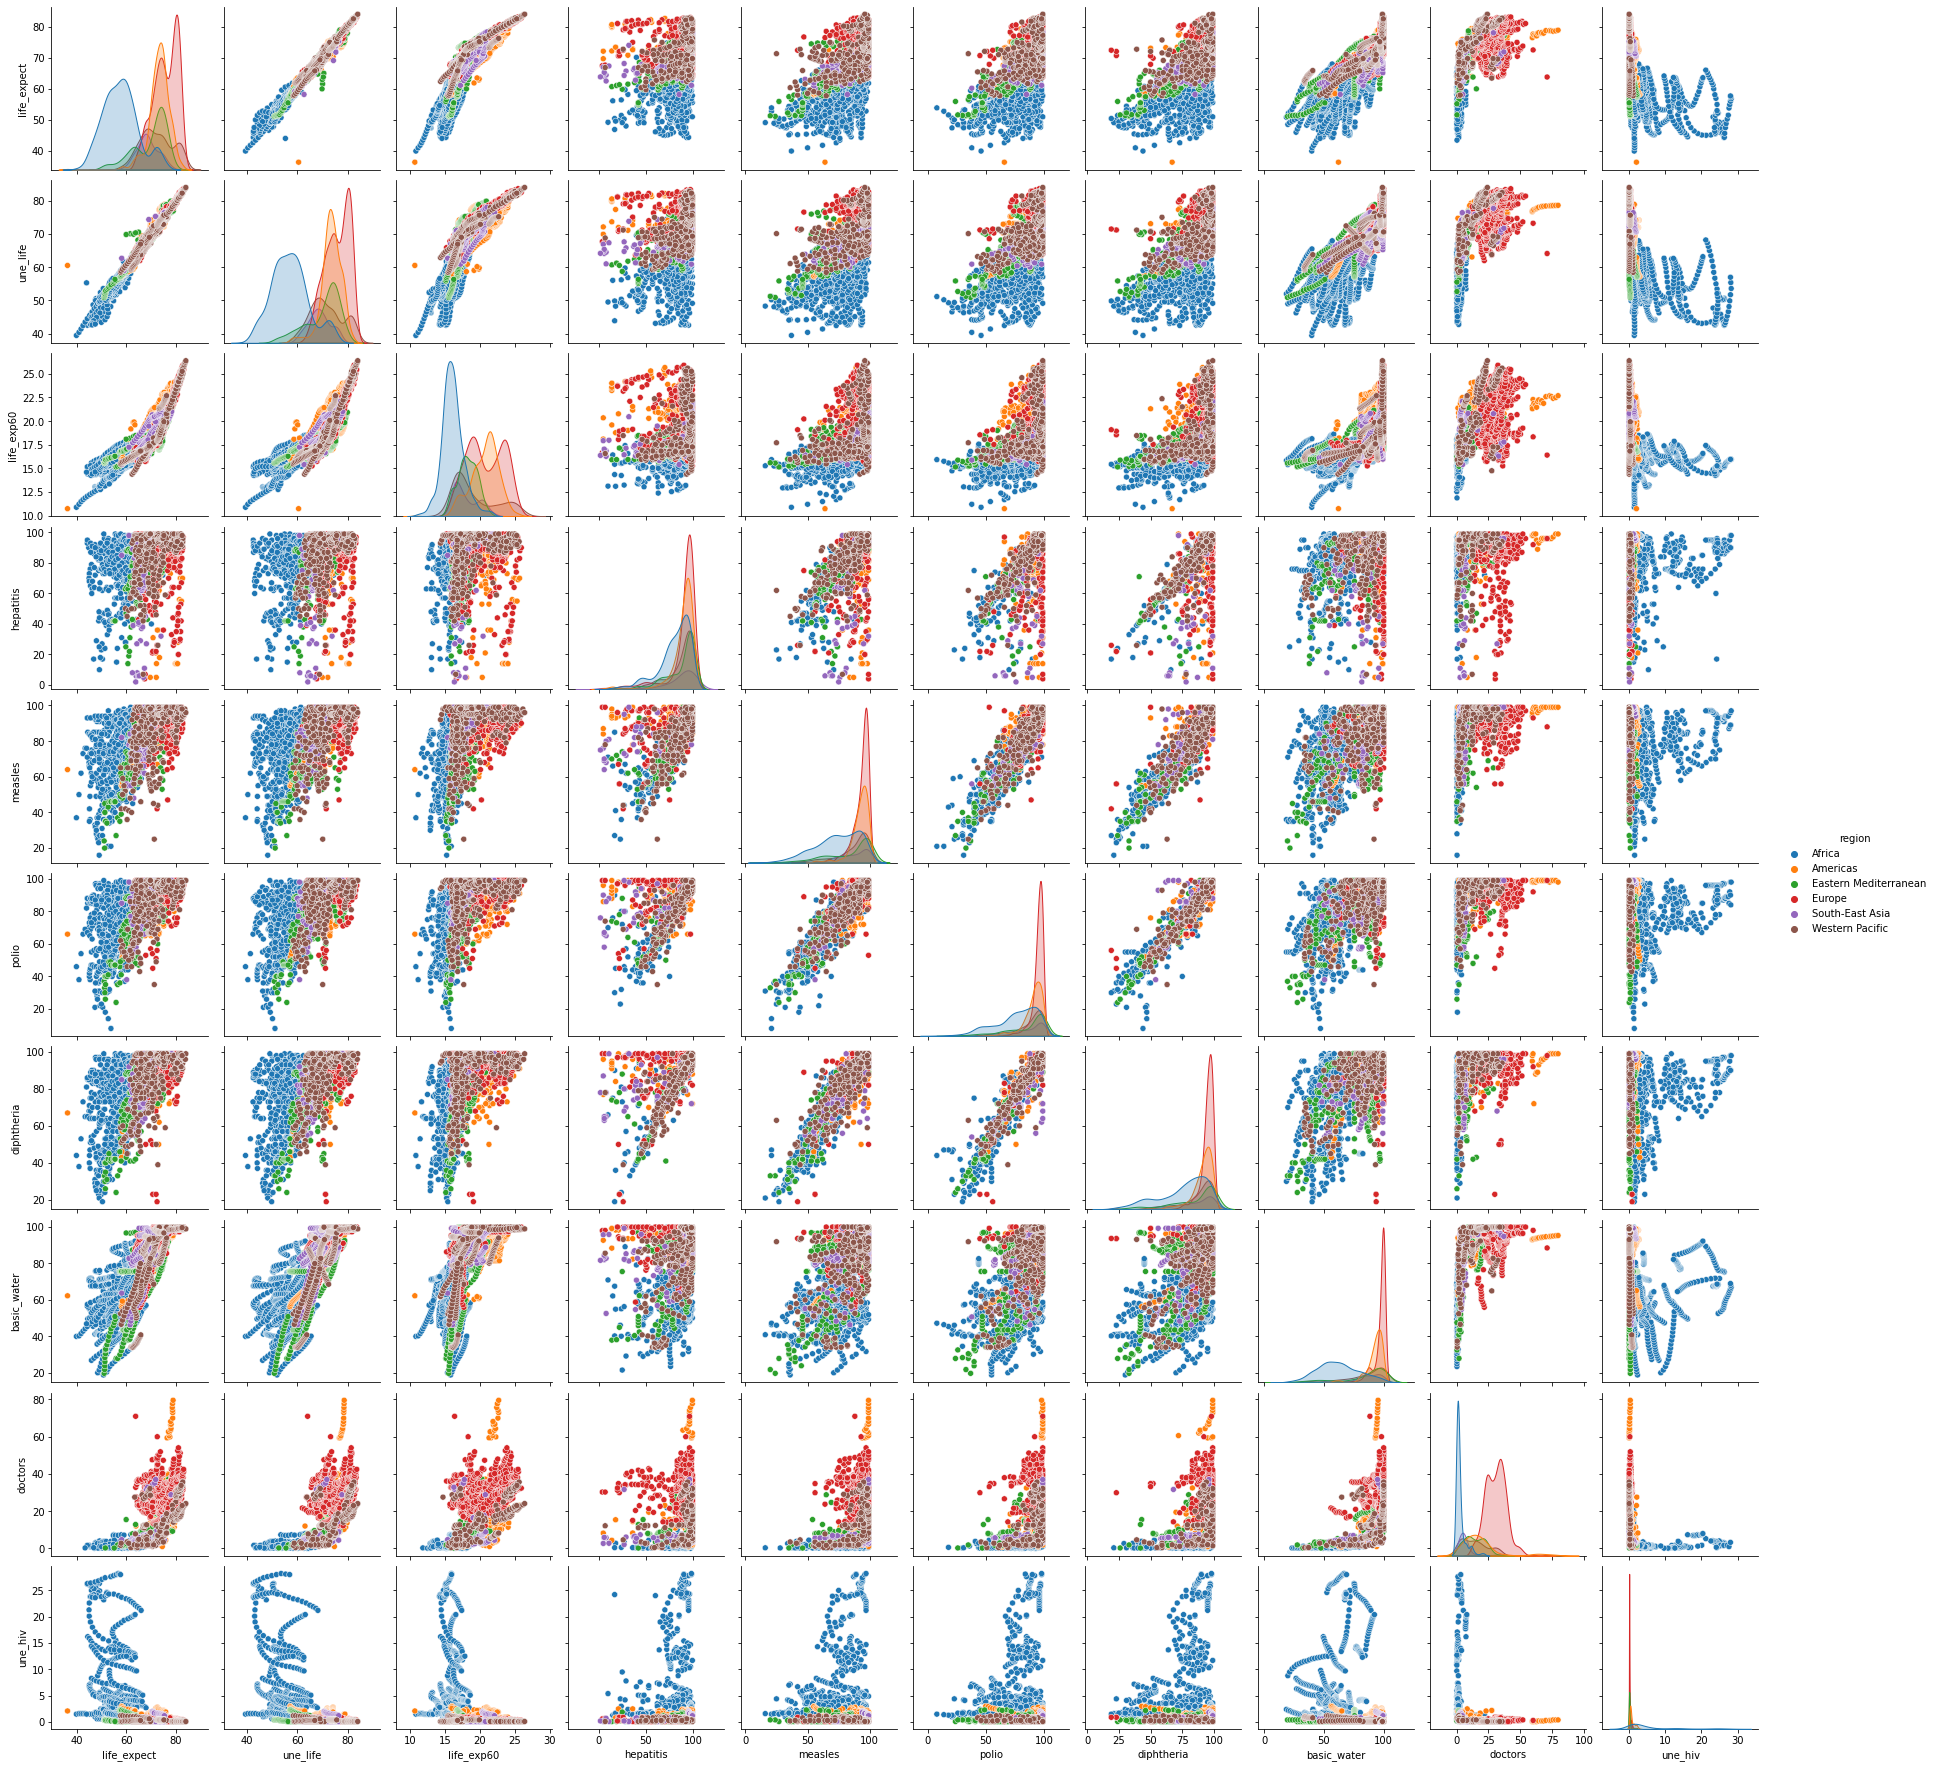

In [32]:
# pop sanitary correlations
pop_sanitary_df = df_clean[[*base_cols, 'hepatitis', 'measles', 'polio', 
                            'diphtheria', 'basic_water', 'doctors', 'une_hiv']]
corr_report(pop_sanitary_df, figsize=(12, 9))

### Governments actions correlations

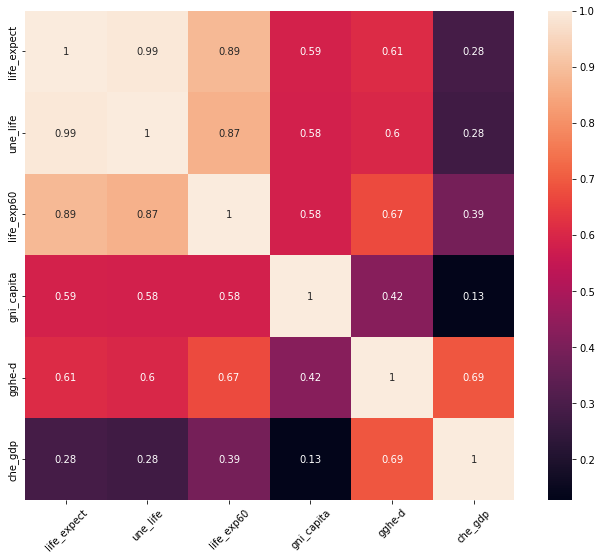

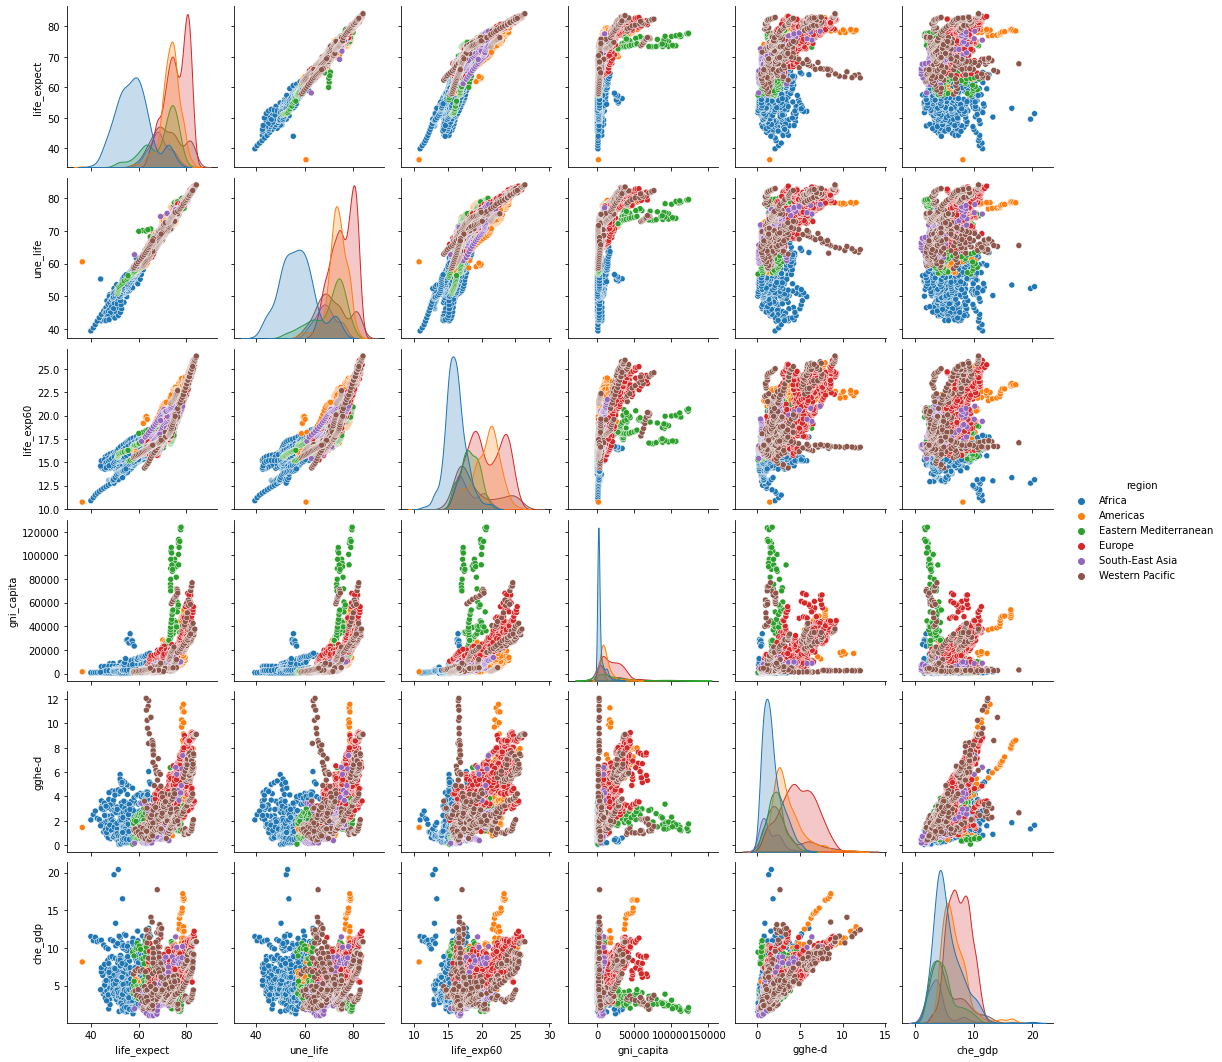

In [34]:
gov_df = df_clean[[*base_cols, 'gni_capita', 'gghe-d', 'che_gdp']]
corr_report(gov_df, figsize=(12, 9))

### Analysis per country

<AxesSubplot:title={'center':'Dataset repartition per country'}>

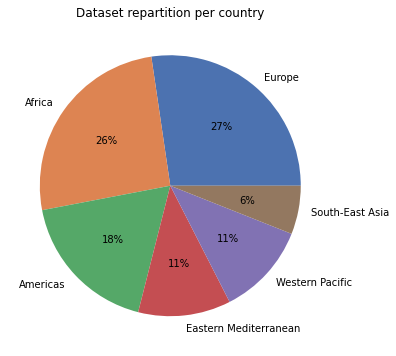

In [46]:
# Repartition of the dataset per region
per_region = df_clean['region'].value_counts(normalize=True)

plt.figure(figsize=(9,6))
colors = sns.color_palette('deep')[:df_clean.shape[0]]

per_region.plot.pie(
    title='Dataset repartition per country',
    label="",
    colors=colors,
    autopct='%.0f%%')

<AxesSubplot:title={'center':'Proportion of missing values per region'}, xlabel='region'>

<Figure size 1080x1080 with 0 Axes>

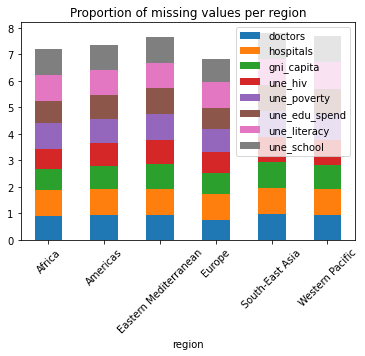

In [197]:
# Missing data
per_miss_20['region'] = df['region']
miss_region = per_miss_20.groupby(['region']).count().reset_index()

numeric_cols = miss_region.select_dtypes("int64").columns
miss_region[numeric_cols] = miss_region[numeric_cols].apply(lambda x: 1 - (x / per_miss_20.shape[0]), axis=1)

plt.figure(figsize=(15, 15))
miss_region.plot.bar(
    title="Proportion of missing values per region",
    x='region', 
    stacked=True, 
    rot=45)

In [49]:
# Target distribution per region
for i, t in enumerate(['life_expect', 'une_life', 'life_exp60']):
    fig = px.violin(df_clean,
        title=f'Distribution of {t} per region',
        y = t,
        x = 'region',
        color=df_clean['region'],
        points='all',
        box=True
    )
    fig.show()

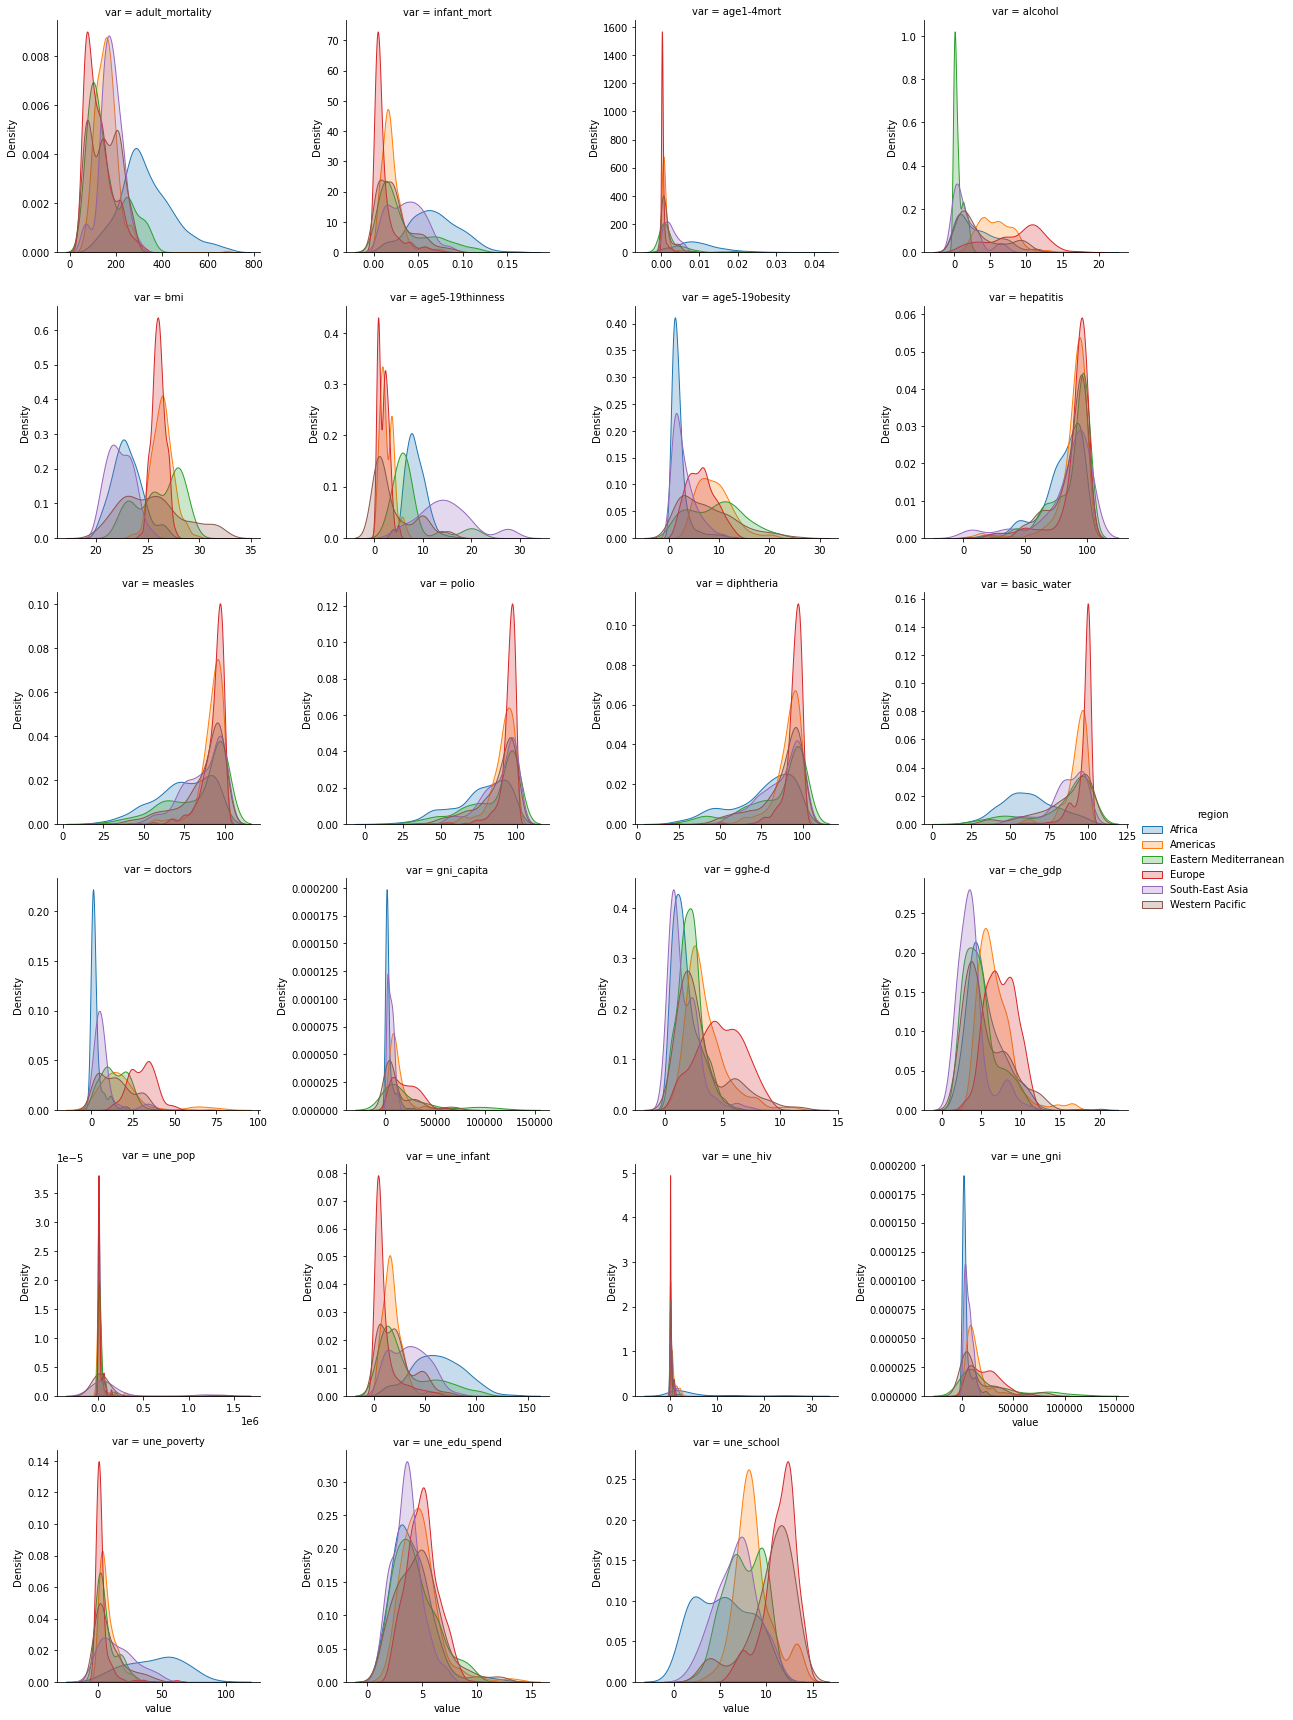

In [166]:
plot_multi_distrib(float_melt_df, x='value', 
    col_var='var', n_cols=4, 
    hue='region', **{'fill': True, 'multiple': 'stack'})